In [1]:
import tensorflow as tf
tf.keras.Model
tf.keras
print(tf.keras.__version__)
tf.test.gpu_device_name()

2022-12-20 22:30:43.418202: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.11.0


2022-12-20 22:30:50.465435: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-20 22:30:50.617073: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-20 22:30:50.665413: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-20 22:30:50.665913: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_nod

'/device:GPU:0'

In [ ]:
#!pip install pandas
#!pip install --timeout=10000 matplotlib
#!pip install pydot
!pip install tensorflow-text

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/danielmiessler/SecLists/master/Passwords/Common-Credentials/10-million-password-list-top-1000000.txt"

df_in = pd.read_csv(url, header=None)
df_in = pd.read_csv(url, header=None)

def add_space(x):
    return " ".join(x)

df = df_in[0].dropna().apply(lambda x: add_space(x) + "~~")

In [ ]:
import tensorflow_text as tf_text
tokenizer = tf_text.WhitespaceTokenizer()
tokens = tokenizer.tokenize(df)


ModuleNotFoundError: No module named 'tensorflow_text'

In [ ]:
df

0               1 2 3 4 5 6~~
1           p a s s w o r d~~
2           1 2 3 4 5 6 7 8~~
3               q w e r t y~~
4         1 2 3 4 5 6 7 8 9~~
                 ...         
999993          v j h t 0 8~~
999994      V j h t 0 4 0 9~~
999995          v j h t 0 4~~
999996          v j h t 0 1~~
999997        v j h t 0 0 8~~
Name: 0, Length: 999996, dtype: object

In [ ]:
#Prepare the Data
from keras_preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts()
encoded = tokenizer.texts_to_sequences()[0]

vocab_size = len(tokenizer.word_index) + 1

word2idx = tokenizer.word_index
idx2word = tokenizer.index_word

ModuleNotFoundError: No module named 'keras_preprocessing'

In [ ]:
import numpy as np
import random
train_numbers = [random.randrange(1, 50, 1) for i in range(500)]
# train_labels = np.add(train_numbers, 1).tolist()

def mod(x):
    return 0.3*x**2+5 + x*0.4
train_labels = [mod(x) for x in train_numbers]

# Create features (using tensors)

def trans_x(X):
    return tf.constant([ (1, x,x**2) for x in X] )

X = trans_x(train_numbers)

# Create labels (using tensors)
y = tf.constant(train_labels)

print(train_numbers)
print(train_labels)

[40, 38, 5, 46, 37, 45, 27, 47, 38, 24, 46, 20, 16, 31, 6, 2, 47, 16, 27, 32, 2, 9, 42, 47, 32, 19, 22, 35, 43, 27, 18, 9, 4, 9, 37, 21, 26, 31, 5, 14, 48, 33, 46, 26, 27, 25, 6, 25, 32, 7, 3, 6, 29, 16, 10, 13, 18, 9, 7, 3, 37, 26, 15, 39, 47, 13, 38, 47, 22, 27, 42, 39, 45, 48, 18, 33, 15, 38, 43, 15, 12, 33, 48, 6, 31, 35, 3, 19, 10, 28, 19, 7, 49, 4, 46, 16, 29, 47, 5, 26, 48, 23, 19, 11, 20, 34, 2, 23, 18, 35, 15, 20, 35, 38, 3, 43, 44, 38, 30, 18, 17, 9, 45, 44, 24, 41, 9, 33, 40, 26, 16, 46, 23, 7, 47, 30, 10, 29, 40, 39, 3, 30, 6, 9, 36, 13, 3, 13, 12, 46, 37, 17, 48, 1, 6, 16, 10, 22, 21, 35, 31, 20, 48, 43, 20, 15, 3, 14, 12, 31, 38, 31, 8, 28, 20, 35, 8, 39, 15, 15, 17, 19, 33, 47, 18, 20, 41, 48, 7, 49, 2, 25, 38, 18, 7, 4, 21, 12, 43, 3, 23, 22, 6, 34, 8, 5, 4, 41, 47, 8, 47, 18, 45, 35, 3, 24, 12, 25, 17, 15, 19, 32, 45, 18, 22, 21, 1, 16, 4, 20, 42, 32, 5, 45, 21, 2, 23, 36, 17, 41, 19, 21, 12, 30, 40, 19, 9, 25, 39, 42, 22, 32, 25, 37, 8, 32, 43, 19, 40, 1, 41, 49, 18, 

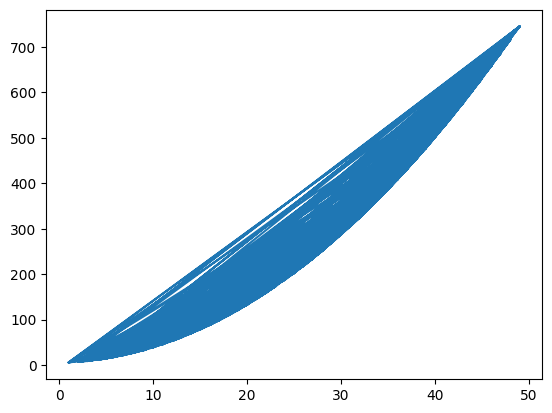

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_numbers, train_labels)
plt.show()

In [ ]:
# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(3,)),
  tf.keras.layers.Dense(100, activation='relu'),
  #tf.keras.layers.Dense(1000, activation='sigmoid'),
  #tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

model.fit( X , y, epochs=100, verbose=1)    # I am not sure if my fitting here works, my code does not make it here


Epoch 1/100
16/16 [==============================] - 1s 10ms/step - loss: 227768.4688 - mae: 354.8324
Epoch 2/100
16/16 [==============================] - 0s 10ms/step - loss: 82475.5703 - mae: 213.1187
Epoch 3/100
16/16 [==============================] - 0s 8ms/step - loss: 16402.2051 - mae: 93.3548
Epoch 4/100
16/16 [==============================] - 0s 9ms/step - loss: 720.6600 - mae: 17.4815
Epoch 5/100
16/16 [==============================] - 0s 8ms/step - loss: 388.1382 - mae: 13.7382
Epoch 6/100
16/16 [==============================] - 0s 8ms/step - loss: 94.9603 - mae: 6.6657
Epoch 7/100
16/16 [==============================] - 0s 8ms/step - loss: 13.6759 - mae: 3.3632
Epoch 8/100
16/16 [==============================] - 0s 8ms/step - loss: 11.9111 - mae: 3.1111
Epoch 9/100
16/16 [==============================] - 0s 8ms/step - loss: 11.2222 - mae: 3.0279
Epoch 10/100
16/16 [==============================] - 0s 9ms/step - loss: 10.4286 - mae: 2.9069
Epoch 11/100
16/16 [========

In [ ]:
test_number = [random.randrange(1, 50, 1) for i in range(100)]
predictions = model.predict(trans_x( test_number) )
print(predictions)
print([mod(x) for x in test_number])

4/4 [==============================] - 0s 4ms/step
[[305.9963   ]
 [ 78.44806  ]
 [744.0167   ]
 [345.14563  ]
 [453.43094  ]
 [305.9963   ]
 [202.82794  ]
 [ 26.775408 ]
 [133.20825  ]
 [325.27344  ]
 [744.0167   ]
 [365.61267  ]
 [109.51743  ]
 [251.73473  ]
 [  4.2261972]
 [121.065056 ]
 [ 78.44806  ]
 [408.33188  ]
 [ 26.775408 ]
 [430.58386  ]
 [408.33188  ]
 [187.71562  ]
 [408.33188  ]
 [ 60.713066 ]
 [234.83748  ]
 [187.71562  ]
 [550.7688   ]
 [ 69.28278  ]
 [ 69.28278  ]
 [603.00757  ]
 [ 88.20895  ]
 [500.90988  ]
 [  5.656834 ]
 [159.27599  ]
 [234.83748  ]
 [ 32.377148 ]
 [744.0167   ]
 [630.01953  ]
 [  7.7104735]
 [145.94705  ]
 [500.90988  ]
 [ 98.5654   ]
 [603.00757  ]
 [  5.656834 ]
 [453.43094  ]
 [603.00757  ]
 [ 60.713066 ]
 [121.065056 ]
 [173.19832  ]
 [ 60.713066 ]
 [685.8281   ]
 [657.6263   ]
 [109.51743  ]
 [ 98.5654   ]
 [218.5352   ]
 [ 21.76408  ]
 [ 98.5654   ]
 [  5.656834 ]
 [ 78.44806  ]
 [ 38.56735  ]
 [159.27599  ]
 [159.27599  ]
 [121.065056 ]
 [ 6

In [ ]:


from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
# Classic approach: RNN in Tensorflow


In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.2550391 , -0.33258602, -0.23841745,  0.16099699,  0.30643624,
        -0.2687475 , -0.42649776,  0.37091383,  0.77455515,  0.01527119]],
      dtype=float32)

In [ ]:
tf.nn.softmax(predictions).numpy() #convert log-odds to probabilities

array([[0.07132419, 0.06600223, 0.07251962, 0.10812323, 0.12504965,
        0.07035312, 0.06008599, 0.13337816, 0.19970268, 0.09346113]],
      dtype=float32)

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
loss_fn(y_train[:1], predictions).numpy()

2.6542282

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5


2022-12-20 15:49:49.084881: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x36dbee10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-12-20 15:49:49.084958: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 SUPER, Compute Capability 7.5
2022-12-20 15:49:49.104215: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2022-12-20 15:49:49.433797: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 16s 7ms/step - loss: 0.2938 - accuracy: 0.9145
Epoch 2/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1437 - accuracy: 0.9578
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1083 - accuracy: 0.9670
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0900 - accuracy: 0.9722
Epoch 5/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0765 - accuracy: 0.9760


In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 2s - loss: 0.0763 - accuracy: 0.9760 - 2s/epoch - 5ms/step


[0.07628161460161209, 0.9760000109672546]

In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])


In [ ]:
probability_model